In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
import scipy.constants as const
import pandas as pd
#import ace_tools as tools

def multiplicity(N, q):
    return sp.comb(N, q, exact=True) 

def factorial_loop(n):
    result = 1
    for i in range(1, n + 1):
        result *= i
    return result

c:\Users\denpr\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


     N_up  N_down  Multiplicity (Ω)  Entropy (S / kB)  Energy (U/mu B)  \
0     100       0               1.0          0.000000             -100   
1      99       1             100.0          4.605170              -98   
2      98       2            4950.0          8.507143              -96   
3      97       3          161700.0         11.993498              -94   
4      96       4         3921225.0         15.181915              -92   
..    ...     ...               ...               ...              ...   
96      4      96         3921225.0         15.181915               92   
97      3      97          161700.0         11.993498               94   
98      2      98            4950.0          8.507143               96   
99      1      99             100.0          4.605170               98   
100     0     100               1.0          0.000000              100   

     magnetization   kT / μB  
0             1.00  0.434294  
1             0.98  0.470193  
2             0.96

C:\Users\denpr\AppData\Local\Temp\ipykernel_15108\4261035088.py:23: RuntimeWarning: divide by zero encountered in divide
  kT_muB = 1 / dS_dE  # In units of kT / μB


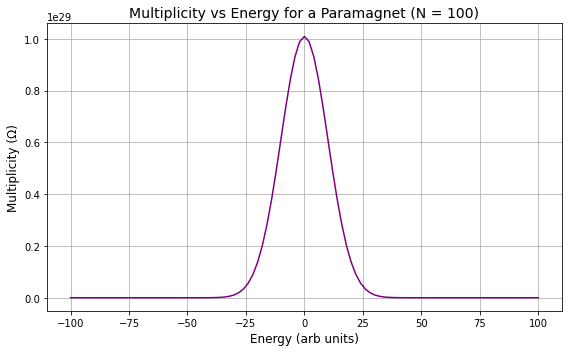

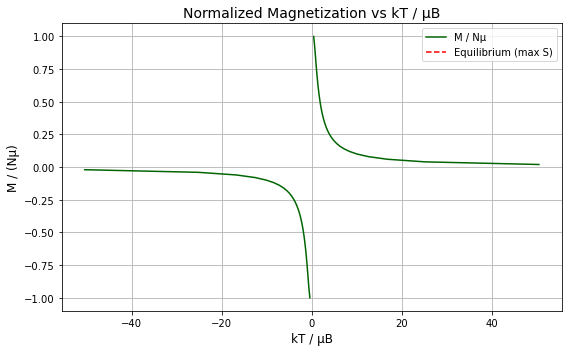

In [26]:
# Two state multiplicity table 
# ----- Parameters -----
N = 100           # Number of dipoles
mu = 1            # Magnetic moment (arb units)
B = 1             # Magnetic field (T)
k_B = 8.6173303e-5          # Boltzmann constant (ev/k)

# ----- Calculation -----
N_down = np.arange(N + 1)
N_up = N - N_down
Omega = np.array([multiplicity(N, q) for q in N_up], dtype=float)
entropy = np.log(Omega)  # Entropy in units of k_B
energy = 1*(N - 2*N_up)
magnetization = -1*(1-2*N_up/N)

# ----- Compute kT / μB -----
# Numerical derivative: d(S/kB)/dE
dS_dE = np.zeros_like(entropy)
dS_dE[1:-1] = (entropy[2:] - entropy[:-2]) / (energy[2:] - energy[:-2])
dS_dE[0] = (entropy[1] - entropy[0]) / (energy[1] - energy[0])  # forward difference
dS_dE[-1] = (entropy[-1] - entropy[-2]) / (energy[-1] - energy[-2])  # backward difference

kT_muB = 1 / dS_dE  # In units of kT / μB
# ----- Build Data Table -----
data = {
    "N_up": N_up,
    "N_down": N_down,
    "Multiplicity (Ω)": Omega,
    "Entropy (S / kB)": entropy,
    "Energy (U/mu B)": energy,
    "magnetization": magnetization,
    "kT / μB": kT_muB
}
max_entropy_idx = np.argmax(entropy)
entropy_max = entropy[max_entropy_idx]
energy_eq = energy[max_entropy_idx]
magnetization_eq = magnetization[max_entropy_idx]
kT_muB_eq = kT_muB[max_entropy_idx]

df = pd.DataFrame(data)
print(df)
# tools.display_dataframe_to_user(name="Paramagnet Table", dataframe=df)
df.to_csv("paramagnet_stats.csv", index=False)

# ----- Plot 1: Multiplicity vs Energy -----
plt.figure(figsize=(8, 5))
plt.plot(energy, Omega, color='purple')
plt.title("Multiplicity vs Energy for a Paramagnet (N = 100)", fontsize=14)
plt.xlabel("Energy (arb units)", fontsize=12)
plt.ylabel("Multiplicity (Ω)", fontsize=12)
plt.grid(True)
plt.tight_layout()
#plt.savefig("Multdist.png")
plt.show()

# ----- Plot 2: Normalized Magnetization vs kT / μB -----
# ----- Updated Plot 2: Magnetization vs kT / μB with Equilibrium Marker -----
plt.figure(figsize=(8, 5))
plt.plot(kT_muB, magnetization, color='darkgreen', label="M / Nμ")
plt.axvline(x=kT_muB_eq, color='red', linestyle='--', label="Equilibrium (max S)")
plt.title("Normalized Magnetization vs kT / μB", fontsize=14)
plt.xlabel("kT / μB", fontsize=12)
plt.ylabel("M / (Nμ)", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


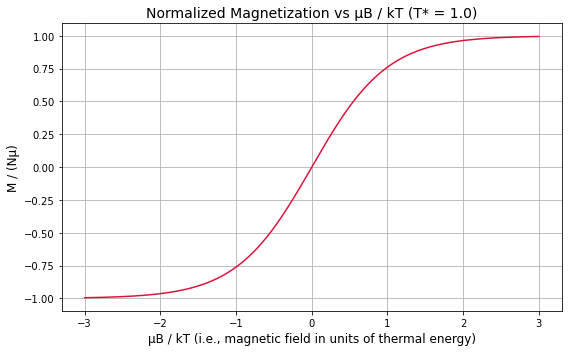

In [ ]:
# ----- Plot 3: Normalized Magnetization vs External Magnetic Field -----

# Choose a fixed temperature to simulate (e.g., from one of your kT/muB values)
# We'll invert it to calculate mu B / kT for the x-axis of tanh()
kT_muB_fixed = 1.0  # example dimensionless temperature

# Build B range and calculate M / Nμ
B_vals = np.linspace(-3, 3, 300)  # dimensionless μB / kT range
magnetization_norm = np.tanh(B_vals / kT_muB_fixed)  # analytical solution

plt.figure(figsize=(8, 5))
plt.plot(B_vals, magnetization_norm, color='crimson')
plt.title(f"Normalized Magnetization vs μB / kT (T* = {kT_muB_fixed})", fontsize=14)
plt.xlabel("μB / kT (i.e., magnetic field in units of thermal energy)", fontsize=12)
plt.ylabel("M / (Nμ)", fontsize=12)
plt.grid(True)
plt.tight_layout()
# plt.savefig("MvsB.png")
plt.show()


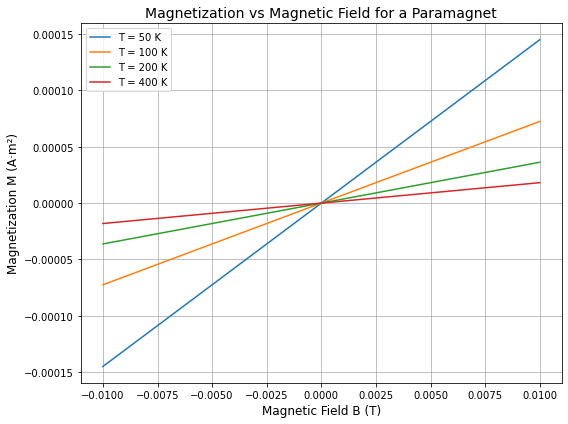

Magnetic Susceptibility at B → 0:
----------------------------------
T = 50 K →  χ = 1.449e-02 (A·m²/T)
T = 100 K →  χ = 7.246e-03 (A·m²/T)
T = 200 K →  χ = 3.623e-03 (A·m²/T)
T = 400 K →  χ = 1.812e-03 (A·m²/T)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters ---
N = 1e23              # Number of dipoles (atoms/molecules)
mu = 1e-23            # Magnetic moment (J/T)
k_B = 1.38e-23        # Boltzmann constan   t (J/K)

# Field and temperature settings
B_vals = np.linspace(-1e-2, 1e-2, 300)  # Magnetic field (T)
temperatures = [50, 100, 200, 400]      # Temperatures (K)

# --- Plot M vs B for various temperatures ---
plt.figure(figsize=(8, 6))
for T in temperatures:
    x = mu * B_vals / (k_B * T)
    M = N * mu * np.tanh(x)
    plt.plot(B_vals, M, label=f"T = {T} K")

plt.title("Magnetization vs Magnetic Field for a Paramagnet", fontsize=14)
plt.xlabel("Magnetic Field B (T)", fontsize=12)
plt.ylabel("Magnetization M (A·m²)", fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --- Calculate and print theoretical susceptibility ---
print("Magnetic Susceptibility at B → 0:")
print("----------------------------------")
for T in temperatures:
    chi = N * mu**2 / (k_B * T)
    print(f"T = {T} K →  χ = {chi:.3e} (A·m²/T)")


## Multiplicity
Calculations for paramaget of N_A particles. Spin up represented as 100 energy
Thermodynamicpropertiesof atwo-stateparamagnetconsistingof
 100elementarydipoles. Microscopicphysicsdetermines theenergyUandtotal
 magnetizationMintermsof thenumberofdipolespointingup,N⇧. Themulti
plicity⌃iscalculatedfromthecombinatoricformula3.27,whiletheentropySis
 kln⌃. Thelasttwocolumnsshowthetemperatureandtheheatcapacity,calcu
latedbytakingderivativesasexplainedinthetext.


In [3]:
# Constants
N_A = 300  # Number of dipoles per paramagnet
N_B = 200
q_total = 100  # Total energy units
mult_A = []
sa_kb = []

# Compute macrostates
q_A_values = np.arange(q_total + 1)  # Possible values for q_A
q_B_values = q_total - q_A_values  # q_B = 80 - q_A

print(q_B_values)
multofa= [multiplicity(N_A, i) for i in q_A_values]  # Compute all multiplicities
mult_A = np.array(multofa, dtype = float)  # Convert list to NumPy array

multofb = [multiplicity(N_B, j) for j in q_B_values]
mult_B = np.array(multofb, dtype = float)

multtot = [multiplicity(N_A, q_A) * multiplicity(N_B, q_B) for q_A, q_B in zip(q_A_values, q_B_values)]
mult_tot = np.array(multtot, dtype = float)

mult_A[mult_A == 0] = np.nan  # Replace zeros with NaN to avoid log errors
mult_B[mult_B == 0] = np.nan
mult_tot[mult_tot == 0] = np.nan

sa_kb = np.log(mult_A)  # Now safely compute log
sb_kb = np.log(mult_B)
s_kb = np.log(mult_tot)

blank = ""
data1 = {
    "q_A": q_A_values,
    "Multiplicity A": mult_A,
    "Entropy A": sa_kb,
    " ": blank,
    "q_B": q_B_values,
    "Multiplicity B": mult_B,
    "Entropy B": sb_kb,
    "  ": blank,
    "Multiplicity Total": mult_tot,
    "Entropy Total": s_kb
}

d1pd = pd.DataFrame(data1)

d1pd.to_csv('Figure3-1.csv', index=False)
# Display table 
#tools.display_dataframe_to_user(name="Macrostates Table", dataframe=d1pd)
print(d1pd)


[100  99  98  97  96  95  94  93  92  91  90  89  88  87  86  85  84  83
  82  81  80  79  78  77  76  75  74  73  72  71  70  69  68  67  66  65
  64  63  62  61  60  59  58  57  56  55  54  53  52  51  50  49  48  47
  46  45  44  43  42  41  40  39  38  37  36  35  34  33  32  31  30  29
  28  27  26  25  24  23  22  21  20  19  18  17  16  15  14  13  12  11
  10   9   8   7   6   5   4   3   2   1   0]
     q_A  Multiplicity A   Entropy A     q_B  Multiplicity B   Entropy B     \
0      0    1.000000e+00    0.000000     100    9.054851e+58  135.753236      
1      1    3.000000e+02    5.703782      99    8.965199e+58  135.743286      
2      2    4.485000e+04   10.711079      98    8.701517e+58  135.713433      
3      3    4.455100e+06   15.309560      97    8.279113e+58  135.663671      
4      4    3.307912e+08   19.616998      96    7.721865e+58  135.593991      
..   ...             ...         ... ..  ...             ...         ... ..   
96    96    2.327395e+80  185.051557

C:\Users\denpr\AppData\Local\Temp\ipykernel_15108\2168575184.py:70: RuntimeWarning: overflow encountered in multiply
  probabilities = boltzmann_factors * multiplicities
C:\Users\denpr\AppData\Local\Temp\ipykernel_15108\2168575184.py:71: RuntimeWarning: invalid value encountered in divide
  probabilities = probabilities / np.sum(probabilities)
C:\Users\denpr\AppData\Local\Temp\ipykernel_15108\2168575184.py:96: RuntimeWarning: overflow encountered in multiply
  'Free Energy (J)': -k_B * T * np.log(np.sum(boltzmann_factors * multiplicities))
c:\Users\denpr\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Simulation completed. Data exported to 'paramagnet_simulation_results.csv'
Generated plots for magnetization, susceptibility, and free energy.
Theoretical comparison plot created.
Universal curve plot created.


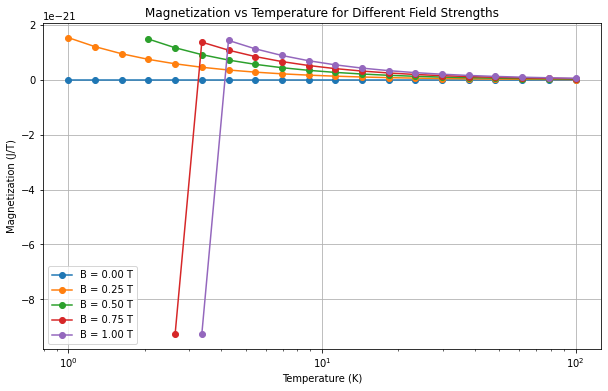

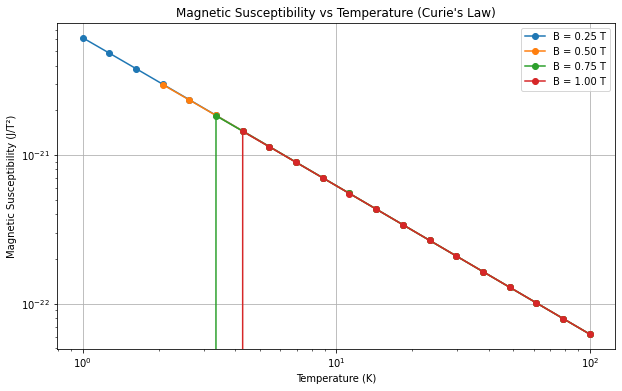

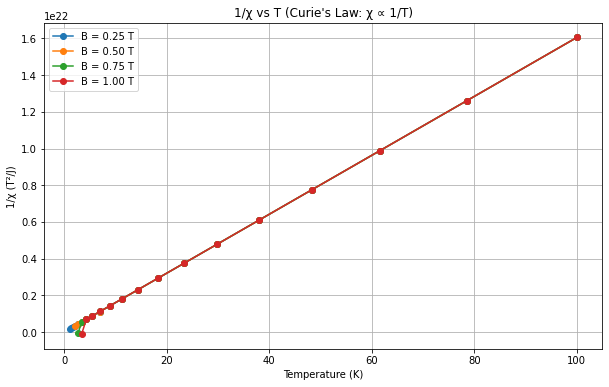

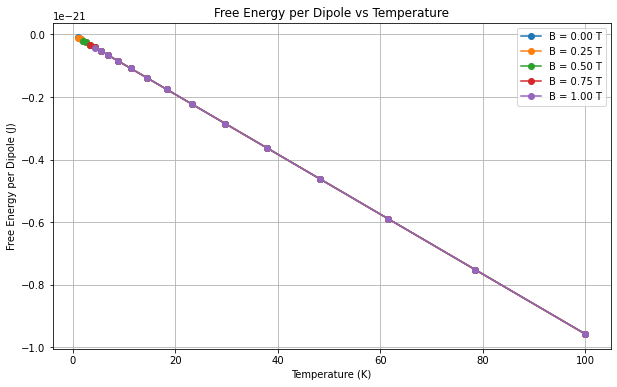

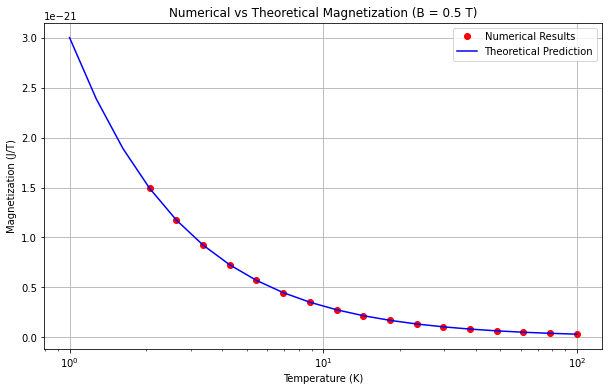

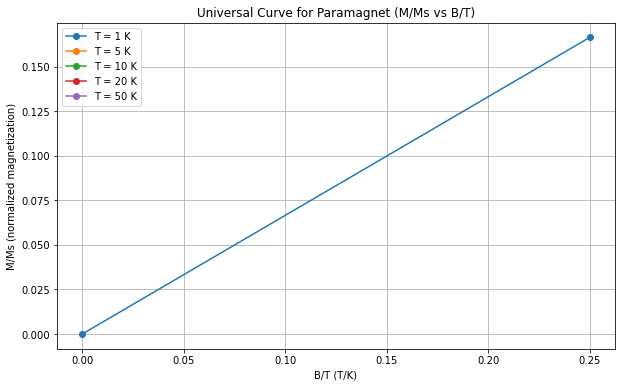

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.special import comb
from scipy import constants

# Function to calculate multiplicity (number of microstates)
def multiplicity(N, n_up):
    """
    Calculate the multiplicity for a paramagnet with N dipoles
    where n_up dipoles are aligned with the external field.
    """
    if n_up < 0 or n_up > N:
        return 0
    return comb(N, n_up, exact=True)

# Function to calculate energy
def energy(n_up, N, mu, B):
    """
    Calculate the energy of the paramagnet.
    n_up: number of dipoles aligned with the field
    N: total number of dipoles
    mu: magnetic moment per dipole
    B: external magnetic field strength
    """
    n_down = N - n_up
    return -mu * B * (n_up - n_down)

# Function to calculate magnetization
def magnetization(n_up, N, mu):
    """
    Calculate the magnetization of the paramagnet.
    """
    n_down = N - n_up
    return mu * (n_up - n_down)

# Constants
N = 1000  # Number of dipoles
mu = 9.274e-24  # Magnetic moment of one dipole (J/T) - Bohr magneton
k_B = constants.Boltzmann  # Boltzmann constant (J/K)

# Range of temperatures to simulate (K)
temperatures = np.logspace(0, 2, 20)  # 1K to 100K

# Range of magnetic fields (T)
B_values = np.linspace(0, 1, 5)  # 0T to 1T

# Create a DataFrame to store results
results = []

# Calculate thermodynamic properties at different temperatures and fields
for B in B_values:
    M_vs_T = []  # Magnetization vs Temperature
    chi_vs_T = []  # Susceptibility vs Temperature
    
    for T in temperatures:
        # Possible states (number of up spins)
        n_up_values = np.arange(N + 1)
        
        # Calculate multiplicity for each state
        multiplicities = np.array([multiplicity(N, n) for n in n_up_values], dtype=float)
        
        # Calculate energy for each state
        energies = np.array([energy(n, N, mu, B) for n in n_up_values])
        
        # Calculate Boltzmann factors
        boltzmann_factors = np.exp(-energies / (k_B * T))
        
        # Calculate probabilities
        probabilities = boltzmann_factors * multiplicities
        probabilities = probabilities / np.sum(probabilities)
        
        # Calculate expected number of up spins (average)
        expected_n_up = np.sum(n_up_values * probabilities)
        
        # Calculate magnetization
        M = magnetization(expected_n_up, N, mu)
        M_vs_T.append(M)
        
        # Calculate magnetic susceptibility (approximation using finite difference)
        if B > 0:
            chi = M / B
        else:
            # Use theoretical value for B=0 (Curie's law)
            chi = (N * mu**2) / (3 * k_B * T)
        
        chi_vs_T.append(chi)
        
        # Store results
        results.append({
            'Temperature (K)': T,
            'Magnetic Field (T)': B,
            'Average Up Spins': expected_n_up,
            'Magnetization (J/T)': M,
            'Susceptibility (J/T²)': chi,
            'Free Energy (J)': -k_B * T * np.log(np.sum(boltzmann_factors * multiplicities))
        })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Plot Magnetization vs Temperature for different field strengths
plt.figure(figsize=(10, 6))
for B in B_values:
    subset = results_df[results_df['Magnetic Field (T)'] == B]
    plt.plot(subset['Temperature (K)'], subset['Magnetization (J/T)'], 
             marker='o', label=f'B = {B:.2f} T')

plt.xscale('log')
plt.xlabel('Temperature (K)')
plt.ylabel('Magnetization (J/T)')
plt.title('Magnetization vs Temperature for Different Field Strengths')
plt.legend()
plt.grid(True)
plt.savefig('magnetization_vs_temperature.png')

# Plot Susceptibility vs Temperature (Curie's Law)
plt.figure(figsize=(10, 6))
for B in B_values[1:]:  # Skip B=0
    subset = results_df[results_df['Magnetic Field (T)'] == B]
    plt.plot(subset['Temperature (K)'], subset['Susceptibility (J/T²)'], 
             marker='o', label=f'B = {B:.2f} T')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Temperature (K)')
plt.ylabel('Magnetic Susceptibility (J/T²)')
plt.title('Magnetic Susceptibility vs Temperature (Curie\'s Law)')
plt.legend()
plt.grid(True)
plt.savefig('susceptibility_vs_temperature.png')

# Plot 1/χ vs T to verify Curie's Law (should be linear)
plt.figure(figsize=(10, 6))
for B in B_values[1:]:  # Skip B=0
    subset = results_df[results_df['Magnetic Field (T)'] == B]
    plt.plot(subset['Temperature (K)'], 1/subset['Susceptibility (J/T²)'], 
             marker='o', label=f'B = {B:.2f} T')

plt.xlabel('Temperature (K)')
plt.ylabel('1/χ (T²/J)')
plt.title('1/χ vs T (Curie\'s Law: χ ∝ 1/T)')
plt.legend()
plt.grid(True)
plt.savefig('inverse_susceptibility_vs_temperature.png')

# Calculate and plot the average energy per dipole vs temperature
plt.figure(figsize=(10, 6))
for B in B_values:
    subset = results_df[results_df['Magnetic Field (T)'] == B]
    plt.plot(subset['Temperature (K)'], subset['Free Energy (J)']/N, 
             marker='o', label=f'B = {B:.2f} T')

plt.xlabel('Temperature (K)')
plt.ylabel('Free Energy per Dipole (J)')
plt.title('Free Energy per Dipole vs Temperature')
plt.legend()
plt.grid(True)
plt.savefig('free_energy_vs_temperature.png')

# Export data
results_df.to_csv('paramagnet_simulation_results.csv', index=False)

print("Simulation completed. Data exported to 'paramagnet_simulation_results.csv'")
print("Generated plots for magnetization, susceptibility, and free energy.")

# Theoretical calculation of magnetization in classical limit
def theoretical_magnetization(N, mu, B, T):
    """Calculate the theoretical magnetization using Brillouin function 
    (classical limit for large N)"""
    # In classical limit, this approaches L(x) where L is the Langevin function
    # and x = mu*B/(k_B*T)
    x = mu * B / (k_B * T)
    # Classical limit of Brillouin function is tanh(x/2)
    return N * mu * np.tanh(x)

# Compare numerical results with theory for a specific field
B_test = 0.5  # Select a field strength for comparison
plt.figure(figsize=(10, 6))

# Plot numerical results
subset = results_df[results_df['Magnetic Field (T)'] == B_test]
plt.plot(subset['Temperature (K)'], subset['Magnetization (J/T)'], 
         'ro', label='Numerical Results')

# Plot theoretical prediction
M_theory = [theoretical_magnetization(N, mu, B_test, T) for T in temperatures]
plt.plot(temperatures, M_theory, 'b-', label='Theoretical Prediction')

plt.xscale('log')
plt.xlabel('Temperature (K)')
plt.ylabel('Magnetization (J/T)')
plt.title(f'Numerical vs Theoretical Magnetization (B = {B_test} T)')
plt.legend()
plt.grid(True)
plt.savefig('theory_comparison.png')

print("Theoretical comparison plot created.")

# Calculate and plot normalized magnetization (M/Ms) vs B/T
plt.figure(figsize=(10, 6))
M_saturation = N * mu  # Saturation magnetization

for T in [1, 5, 10, 20, 50]:
    subset = results_df[results_df['Temperature (K)'] == T]
    plt.plot(subset['Magnetic Field (T)']/T, subset['Magnetization (J/T)']/M_saturation, 
             marker='o', label=f'T = {T} K')

plt.xlabel('B/T (T/K)')
plt.ylabel('M/Ms (normalized magnetization)')
plt.title('Universal Curve for Paramagnet (M/Ms vs B/T)')
plt.legend()
plt.grid(True)
plt.savefig('universal_curve.png')

print("Universal curve plot created.")